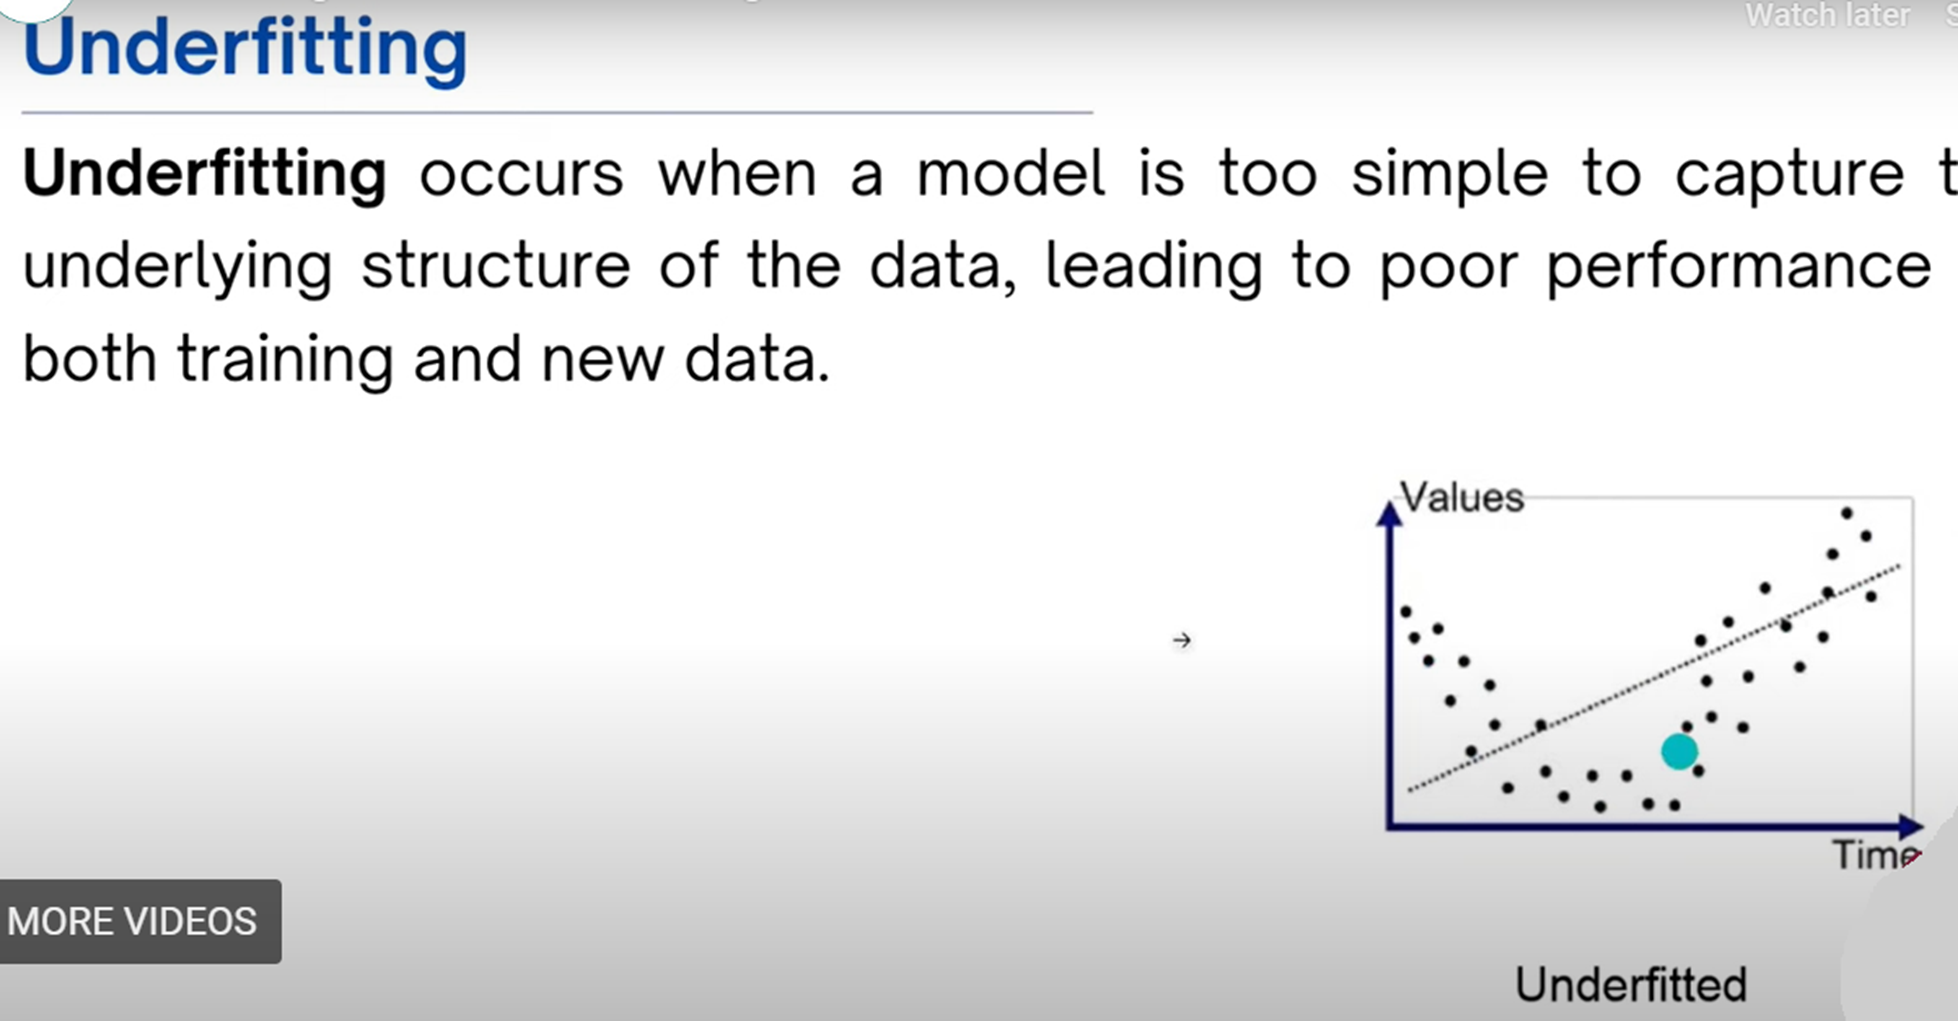

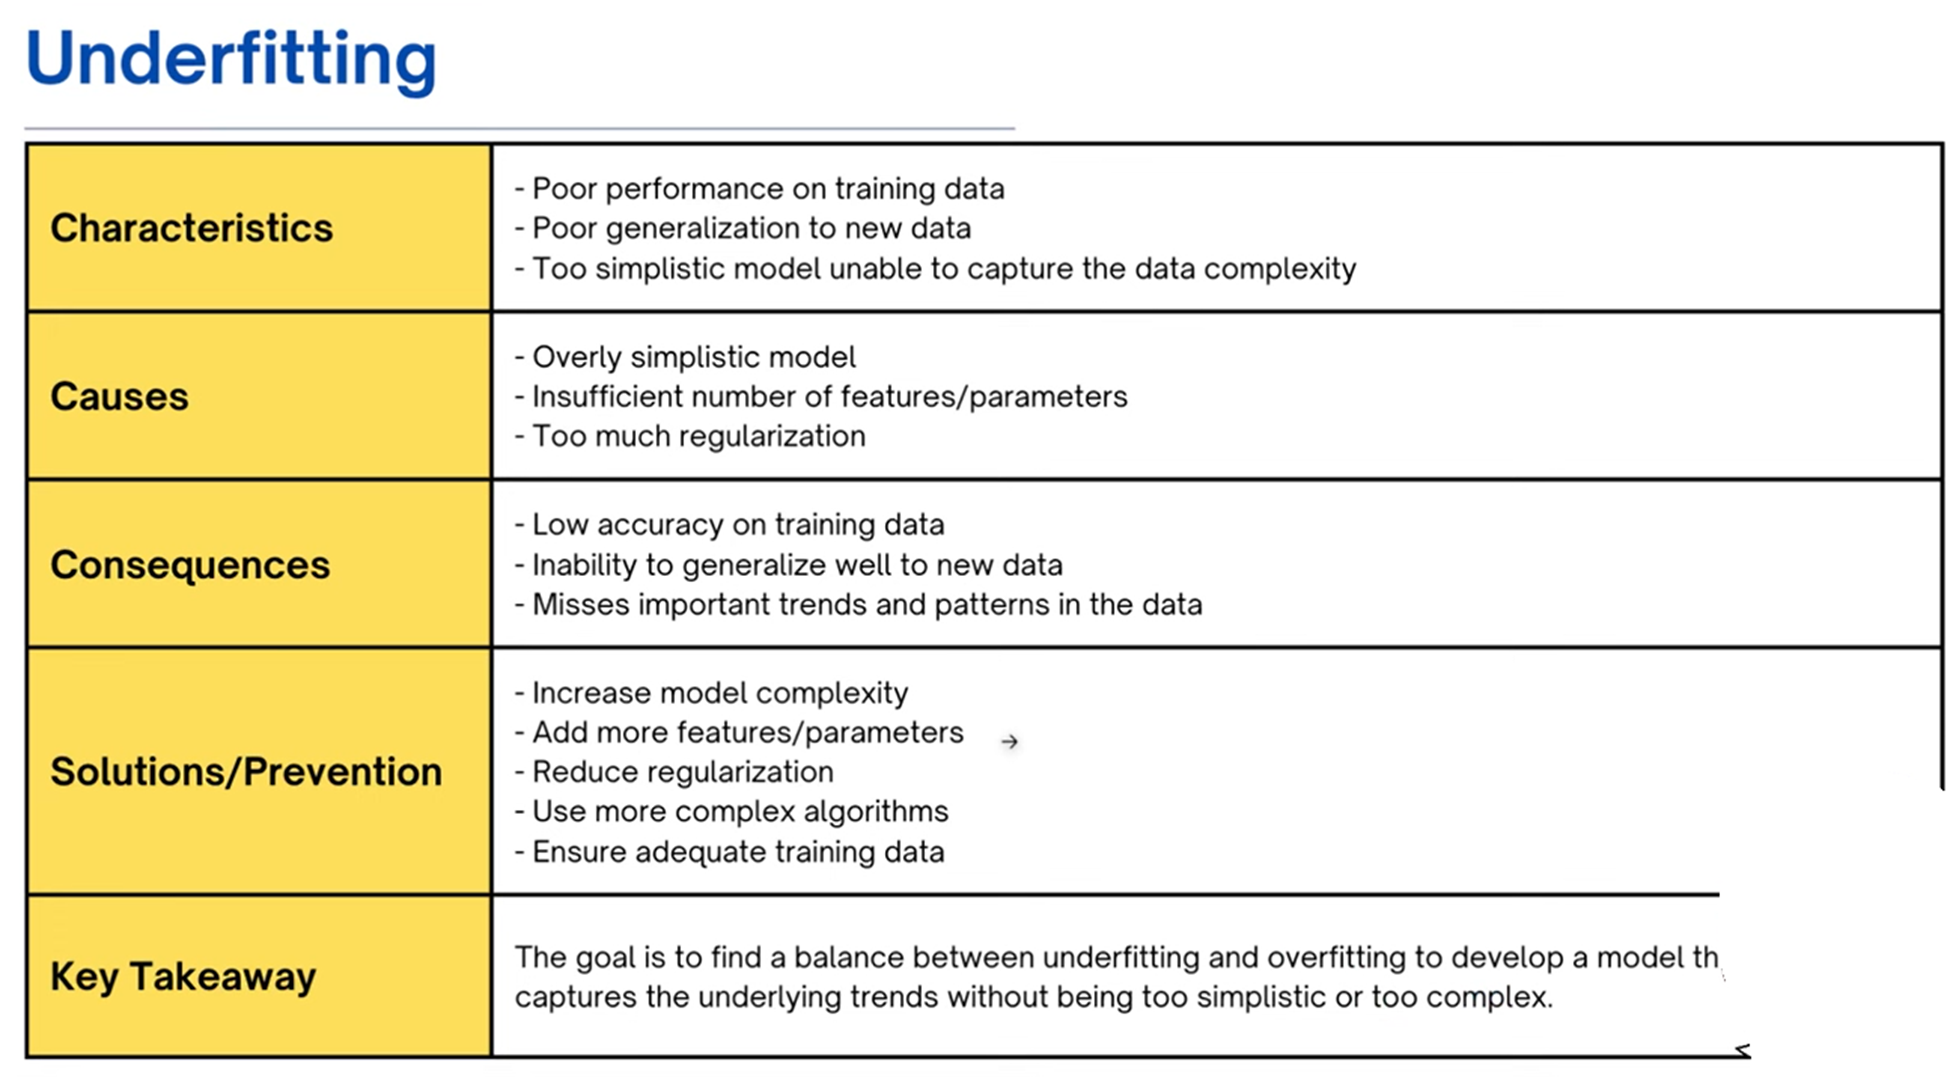

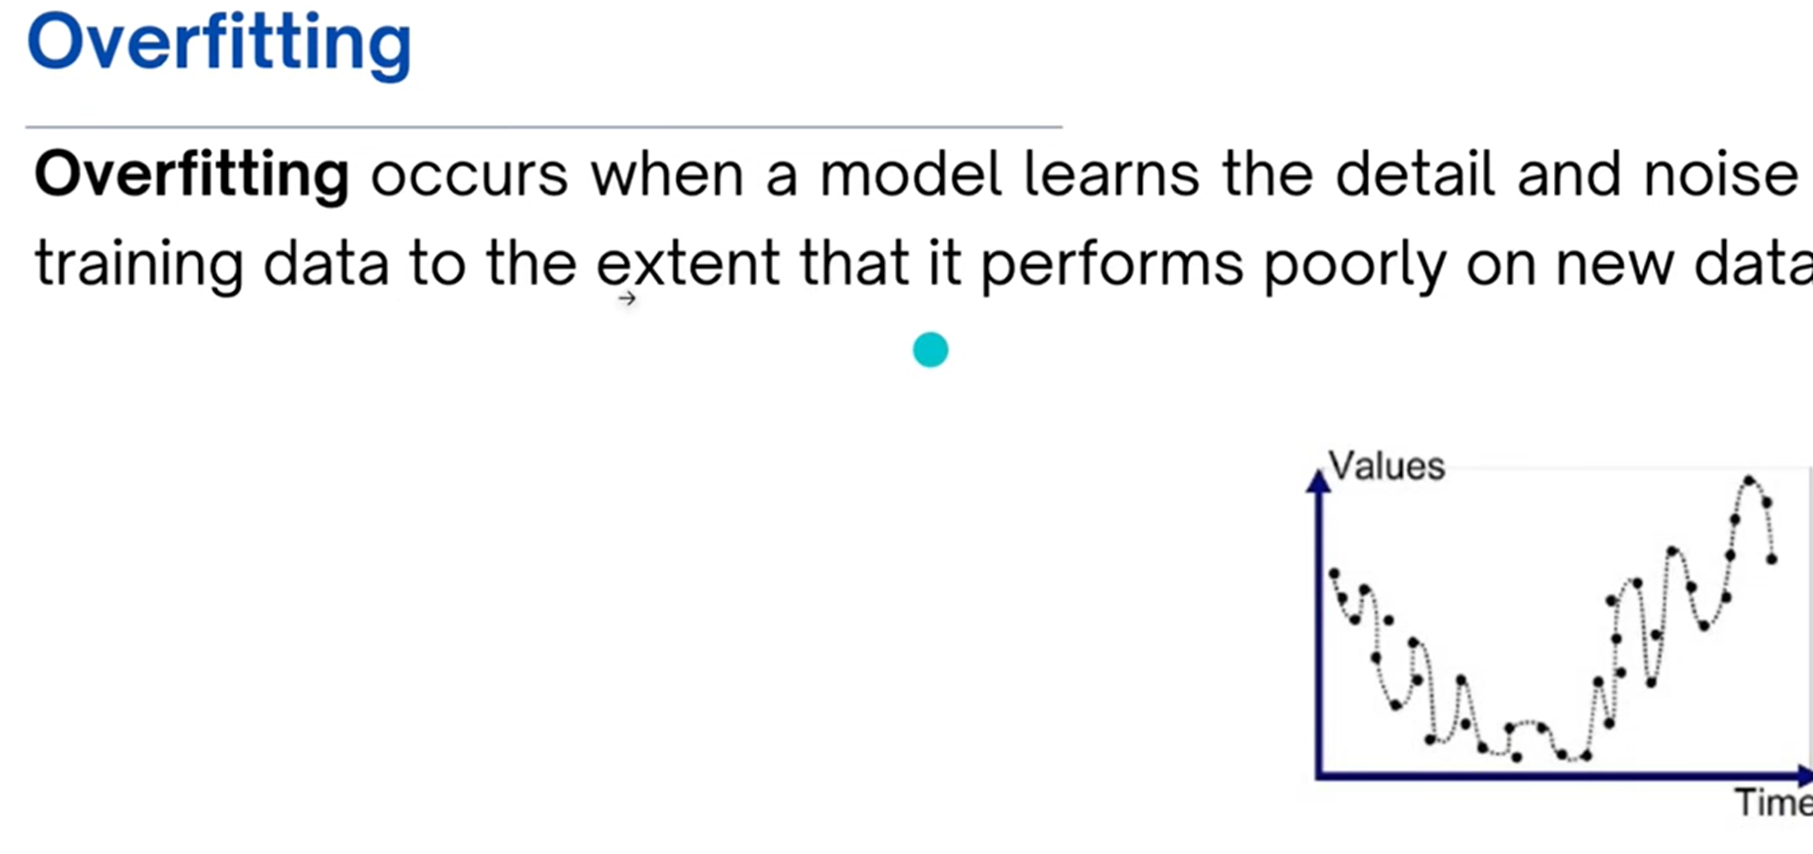

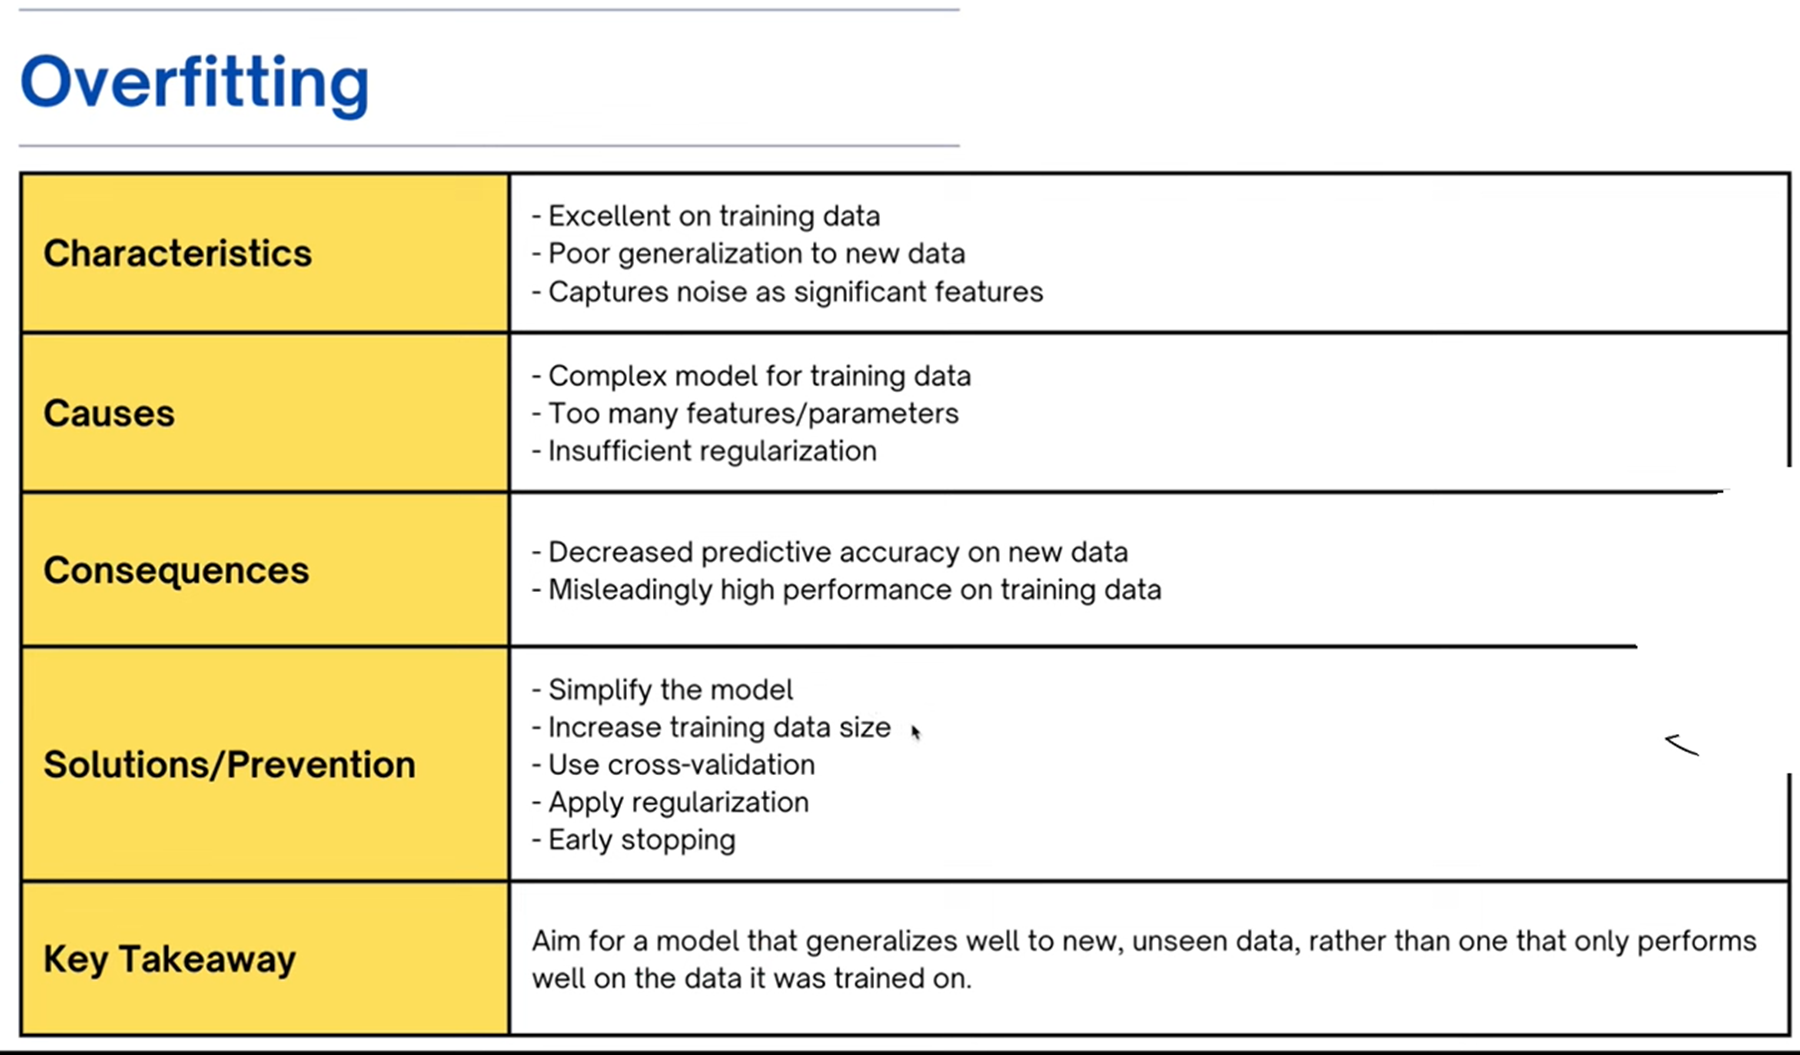

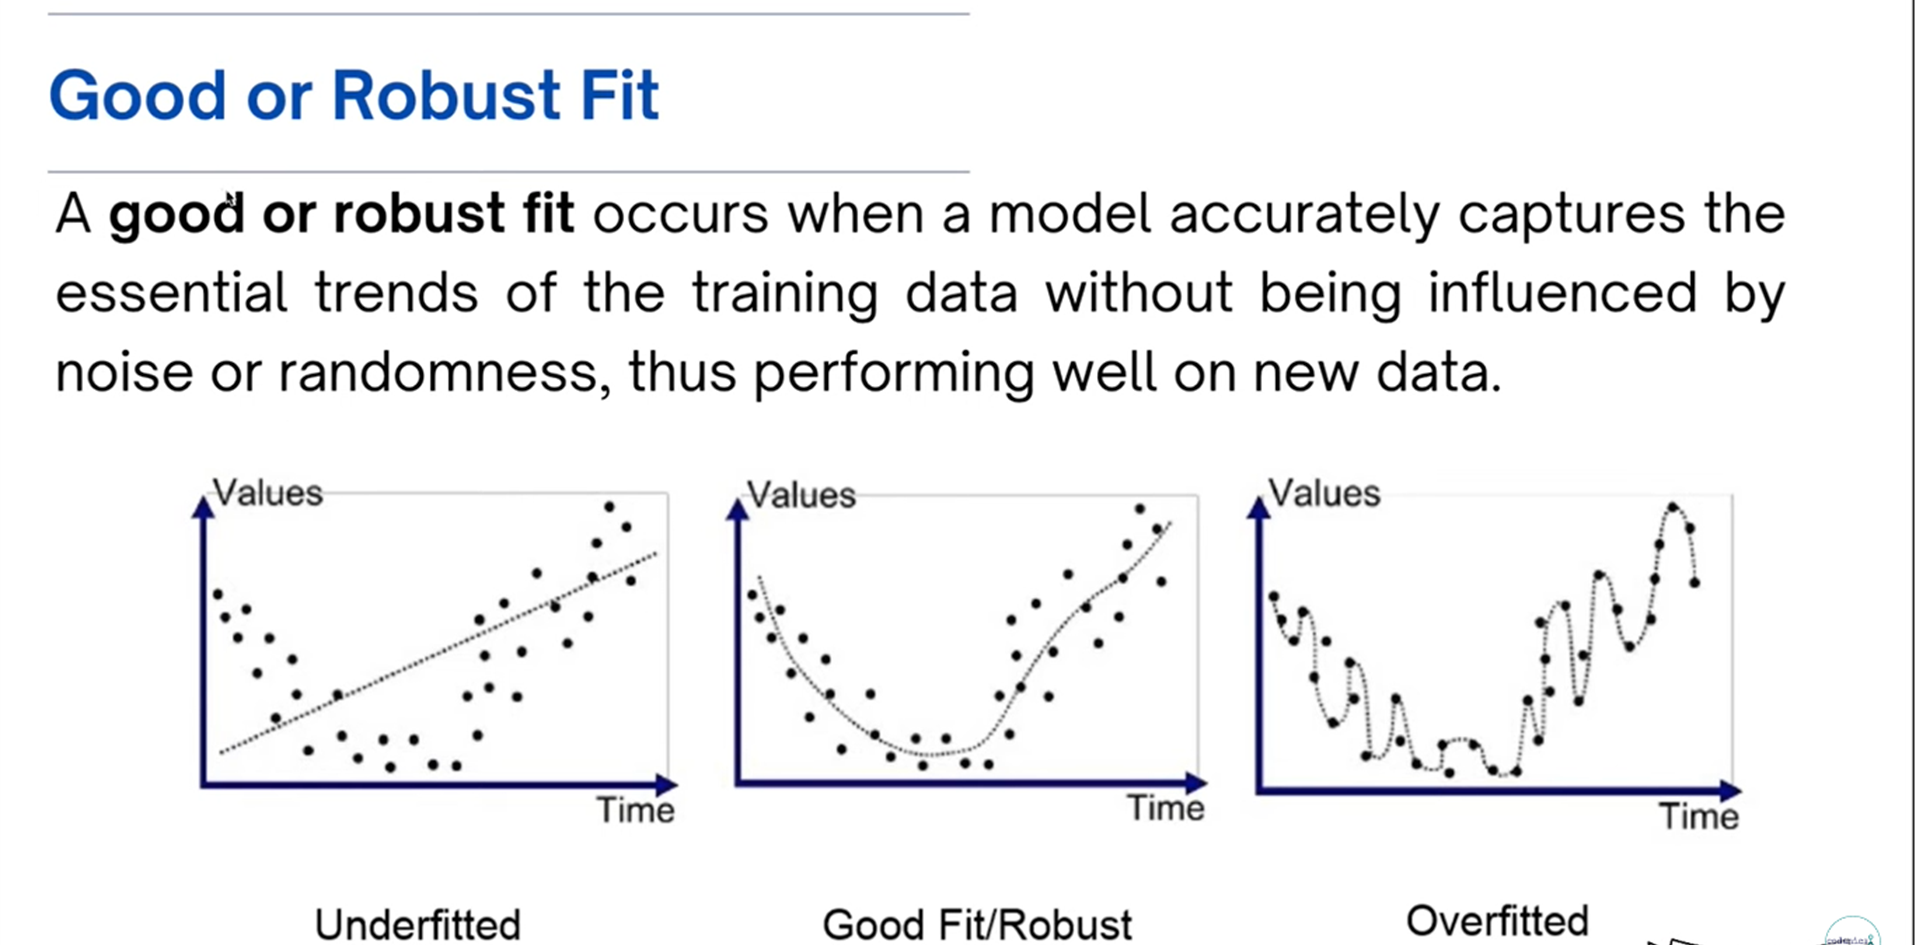

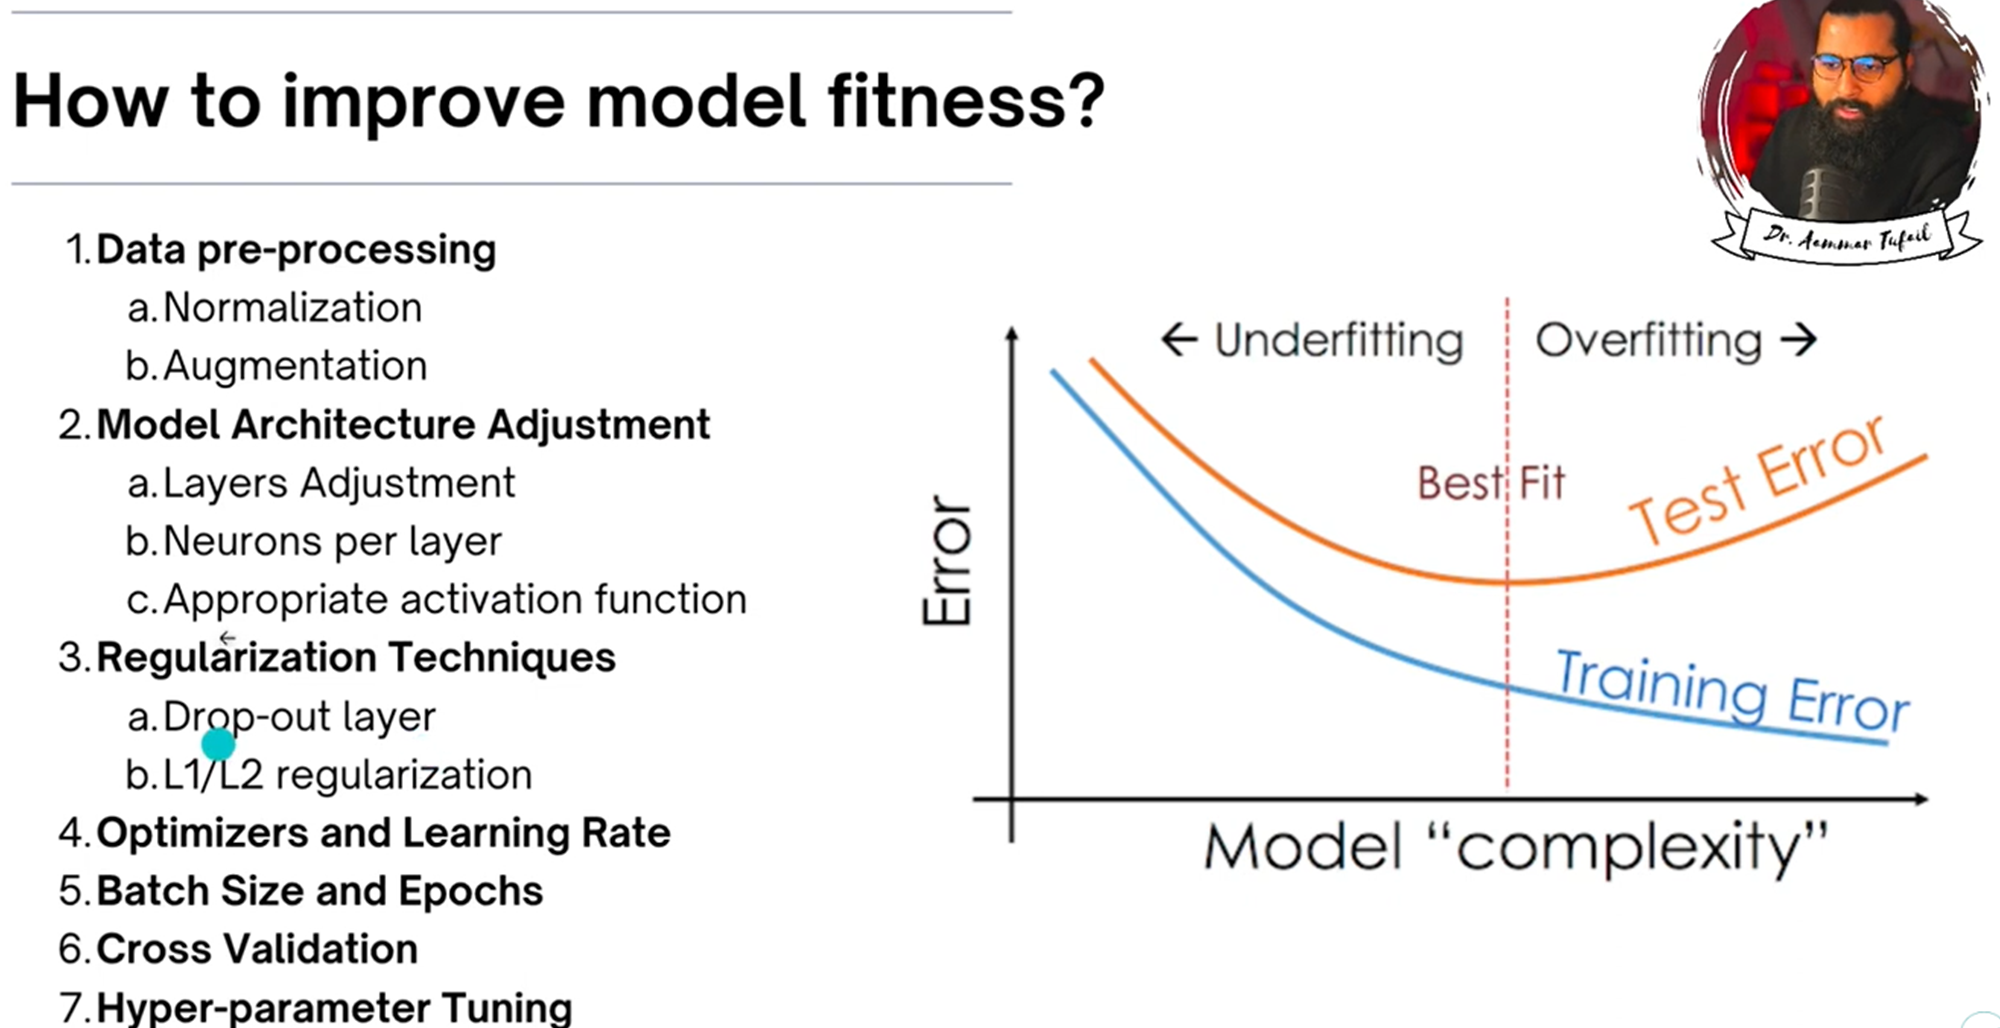

# Overfitting vs. Underfitting

## 1. Setup and Baseline Model**

In [1]:
%%time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
# ignore warnings in the output
import warnings
warnings.filterwarnings("ignore")

CPU times: total: 8.81 s
Wall time: 16.1 s


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Define a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the baseline model
history_baseline = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8122 - loss: 9.6627 - val_accuracy: 0.8951 - val_loss: 0.4940
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9052 - loss: 0.4082 - val_accuracy: 0.9203 - val_loss: 0.3746
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9219 - loss: 0.3095 - val_accuracy: 0.9255 - val_loss: 0.3204
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9340 - loss: 0.2471 - val_accuracy: 0.9327 - val_loss: 0.2666
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9413 - loss: 0.2201 - val_accuracy: 0.9347 - val_loss: 0.3054
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9417 - loss: 0.2217 - val_accuracy: 0.9336 - val_loss: 0.3381
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9463 - loss: 0.2091 - val_accuracy: 0.9426 - val_loss: 0.2670
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9512 - loss: 0.19

## 2. Run model on Normalized Data

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.4924 - val_accuracy: 0.9516 - val_loss: 0.1680
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9602 - loss: 0.1403 - val_accuracy: 0.9647 - val_loss: 0.1207
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9736 - loss: 0.0906 - val_accuracy: 0.9695 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0638 - val_accuracy: 0.9713 - val_loss: 0.0958
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9743 - val_loss: 0.0881
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9730 - val_loss: 0.0929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9767 - val_loss: 0.0836
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9937 - loss: 0.0223 

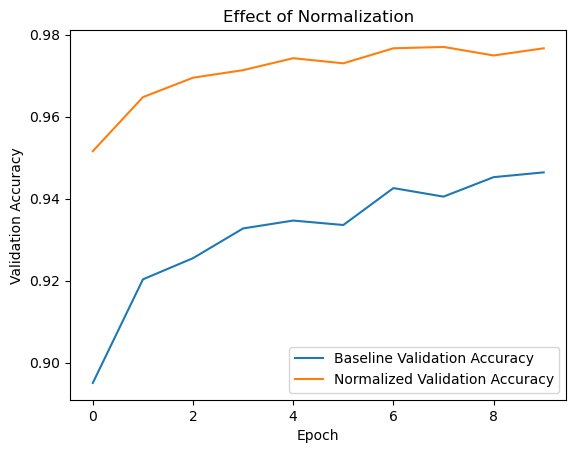

CPU times: total: 1min 52s
Wall time: 1min 30s


In [3]:
%%time
# laod and normalize the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model for normalized data
def create_model_with_norm_data():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_norm_data = create_model_with_norm_data()

# Train the baseline model
history_norm_data = model_with_norm_data.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plot the effect of normalization
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label = 'Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 3. Adding Dropout

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7983 - loss: 0.6621 - val_accuracy: 0.9463 - val_loss: 0.1887
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9261 - loss: 0.2553 - val_accuracy: 0.9619 - val_loss: 0.1343
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9399 - loss: 0.2011 - val_accuracy: 0.9650 - val_loss: 0.1189
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9465 - loss: 0.1810 - val_accuracy: 0.9670 - val_loss: 0.1085
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9535 - loss: 0.1565 - val_accuracy: 0.9689 - val_loss: 0.1020
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9562 - loss: 0.1416 - val_accuracy: 0.9698 - val_loss: 0.1003
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9577 - loss: 0.1372 - val_accuracy: 0.9732 - val_loss: 0.0891
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9592 - loss: 0.1315 -

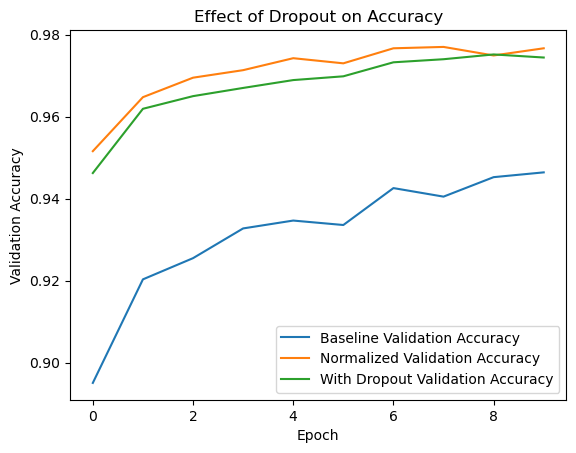

In [4]:
# Define a model with dropout
def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Adding dropout
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()

# Train the model with dropout
history_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of dropout
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.title('Effect of Dropout on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 4. Early Stopping

Finally, we will use early stopping to stop training when the validation loss starts to increase.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8689 - loss: 0.4735 - val_accuracy: 0.9522 - val_loss: 0.1594
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9604 - loss: 0.1332 - val_accuracy: 0.9652 - val_loss: 0.1146
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9752 - loss: 0.0869 - val_accuracy: 0.9685 - val_loss: 0.1031
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9821 - loss: 0.0634 - val_accuracy: 0.9712 - val_loss: 0.0947
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9857 - loss: 0.0471 - val_accuracy: 0.9712 - val_loss: 0.0890
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9896 - loss: 0.0352 - val_accuracy: 0.9742 - val_loss: 0.0847
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9737 - val_loss: 0.0919
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9940 - loss: 0.0216

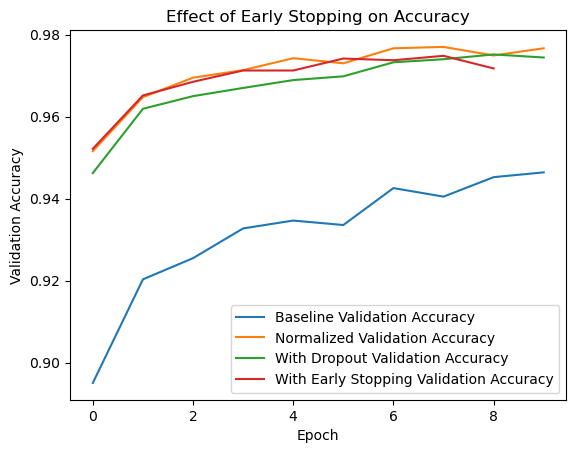

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_with_es = create_model_with_norm_data()

# train with early stop
history_es = model_with_es.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# plot the effect of early stopping
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='With Early Stopping Validation Accuracy')
plt.title('Effect of Early Stopping on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## 5. L1/L2 Regularization

L1 and L2 regularization are two common regularization techniques that can be used to reduce overfitting.

L1 in Keras: kernel_regularizer=regularizers.l1(0.001) L2 in Keras: kernel_regularizer=regularizers.l2(0.001)

L1 changes the loss function by adding the sum of the absolute weights to it. L2 changes the loss function by adding the sum of the squared weights to it.

L1 make zero some of the weights.
L2 make the weights small.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7996 - loss: 0.8956 - val_accuracy: 0.9440 - val_loss: 0.3852
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9211 - loss: 0.4506 - val_accuracy: 0.9574 - val_loss: 0.3244
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9284 - loss: 0.4102 - val_accuracy: 0.9637 - val_loss: 0.2985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9348 - loss: 0.3816 - val_accuracy: 0.9638 - val_loss: 0.2868
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9376 - loss: 0.3677 - val_accuracy: 0.9670 - val_loss: 0.2759
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9426 - loss: 0.3511 - val_accuracy: 0.9688 - val_loss: 0.2721
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9442 - loss: 0.3465 - val_accuracy: 0.9689 - val_loss: 0.2707
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9472 - loss: 0.3354 -

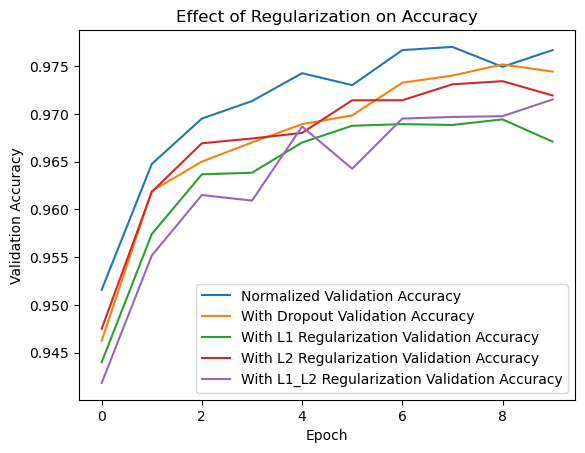

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

# Define a model with L1 regularization
def create_model_with_l1():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),  # L1 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a model with L2 regularization
def create_model_with_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# should we combine them both?
# Define a model with L1_L2 (combined) regularization
def create_model_with_l1_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),  # L1_L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1_L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare and train the models
model_with_l1 = create_model_with_l1()
history_l1 = model_with_l1.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l2 = create_model_with_l2()
history_l2 = model_with_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l1_l2 = create_model_with_l1_l2()
history_l1_l2 = model_with_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of regularization
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

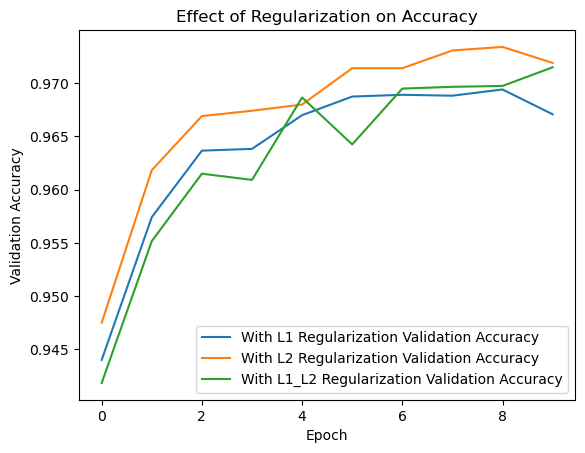

In [7]:
# Plotting the effect of regularization
# plot line for normalized data
# plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
# plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 6. K-fold cross validation
   
k-fold cross-validation in TensorFlow requires a bit more manual setup compared to libraries like scikit-learn, which offer built-in k-fold cross-validation functions. TensorFlow does not have a direct function for k-fold cross-validation, but you can achieve this by manually splitting your dataset into k folds and then training and evaluating your model on each fold.

Below is an example code that demonstrates how to perform k-fold cross-validation with the MNIST dataset in TensorFlow. This example uses a simple neural network similar to the ones discussed previously.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8692 - loss: 0.4618 - val_accuracy: 0.9533 - val_loss: 0.1640
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9614 - loss: 0.1318 - val_accuracy: 0.9640 - val_loss: 0.1159
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9737 - loss: 0.0883 - val_accuracy: 0.9680 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9823 - loss: 0.0600 - val_accuracy: 0.9719 - val_loss: 0.0925
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.9733 - val_loss: 0.0879
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9747 - val_loss: 0.0868
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9758 - val_loss: 0.0812
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9941 - loss: 0.0205 

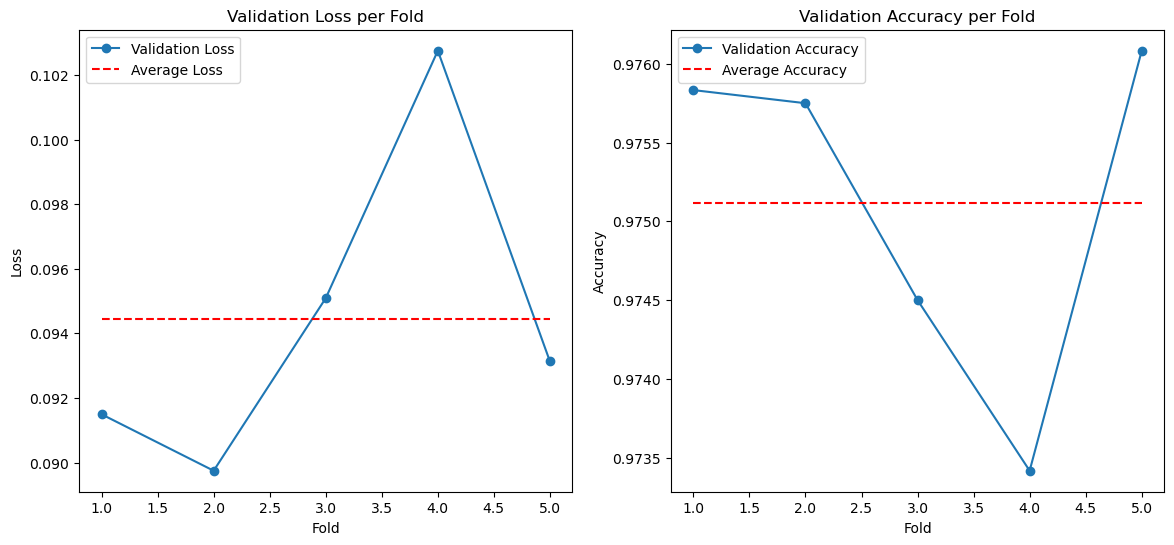

CPU times: total: 7min 25s
Wall time: 6min 34s


In [8]:
%%time
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train = to_categorical(y_train, 10)  # One-hot encode labels

# Define a simple model architecture function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare for k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Arrays to store scores
fold_idx = 1
scores = []

for train_index, val_index in kf.split(x_train):
    # Split data
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # create a model
    model_kfold_cv = create_model()
    
    # Train model
    history_kfold_cv = model_kfold_cv.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold), verbose=1)
    
    # Append the last score from the history
    scores.append((history_kfold_cv.history['val_loss'][-1], history_kfold_cv.history['val_accuracy'][-1]))

# Calculate and print average performance across all folds
average_loss, average_accuracy = np.mean(scores, axis=0)
print(f'\nK-Fold Validation Results:\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}')

# Plotting
folds = range(1, k + 1)
val_losses, val_accuracies = zip(*scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, val_losses, 'o-', label='Validation Loss')
plt.plot(folds, [average_loss] * k, 'r--', label='Average Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(folds, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(folds, [average_accuracy] * k, 'r--', label='Average Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

This code performs the following steps:

Normalizes the data and one-hot encodes the labels.
Defines a simple neural network model inside a function so that a fresh model can be created for each fold.
Uses KFold from sklearn.model_selection to generate train/validation splits.
Trains a new model instance on each train fold and evaluates it on the corresponding validation fold.
Calculates and prints the average loss and accuracy across all folds at the end.
Remember, k-fold cross-validation can be computationally expensive since it involves training and evaluating k separate models. Adjust the number of epochs, model complexity, or the dataset size as necessary to manage the computational load.